In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

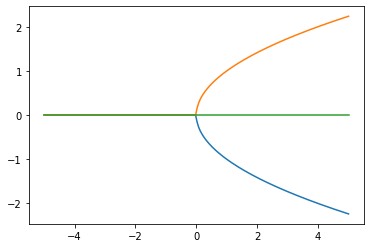

In [62]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return lmbda*x - x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -2, F)

#The middle curve
C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 2, F)

plt.plot(C2, X2)
plt.plot(C3, X3)
plt.plot(C1, X1)
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

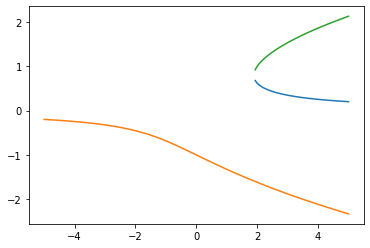

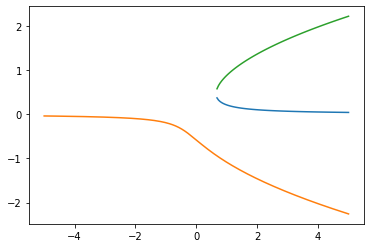

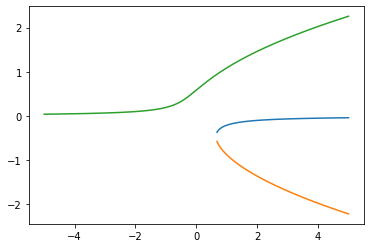

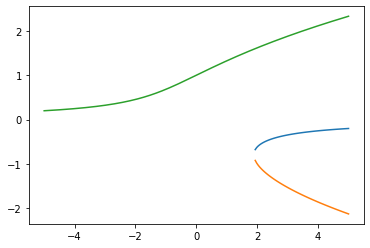

In [67]:
#define our funcitions with different aidas
def F1(x, lmbda):
    return -1+ lmbda*x - x**3

def F2(x, lmbda):
    return -.2 + lmbda*x - x**3

def F3(x, lmbda):
    return .2+ lmbda*x - x**3

def F4(x, lmbda):
    return 1 + lmbda*x - x**3

fs = [F1, F2, F3, F4]

for f in fs:
    # Plot each of the three curves for each aida value
    C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, f)
   
    C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -2, f)

    C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 2, f)

    plt.plot(C1, X1)
    plt.plot(C2, X2)
    plt.plot(C3, X3)
    plt.show()


# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

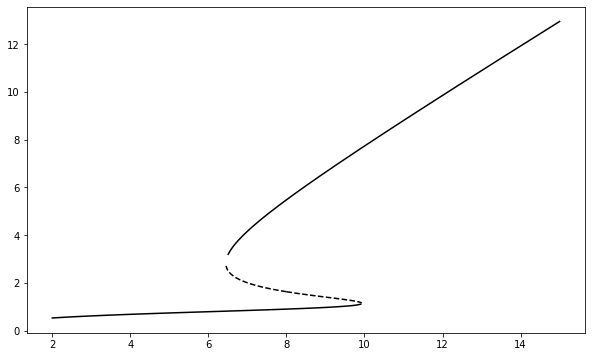

In [68]:
plt.figure(figsize=((10,6)))
#define the budworm population dynamic function
r = .56

def F(x, k):
    return r*x*(1-x/k) - (x**2)/(1+x**2)

#expand along each of the curves with different guesses
C3, X3 = EmbeddingAlg(np.flip(np.linspace(2, 15, 200)), 8, F)
C4, X4 = EmbeddingAlg((np.linspace(2, 15, 200)), 5, F)
C5, X5 = EmbeddingAlg((np.linspace(8, 12, 200)), 2, F)
C6, X6 = EmbeddingAlg((np.linspace(8, 4, 200)), 2, F)

#Plot each of the 4 parts of the bifurcation diagram
plt.plot(C3, X3, '-k')
plt.plot(C4, X4, '-k')
plt.plot(C5, X5, '--k')
plt.plot(C6, X6, '--k')
plt.show()